<a href="https://colab.research.google.com/github/ashwinikr295/heart-disease-prediction-using-machine-learning/blob/main/heart_dissease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
Problem Statement--

This project focuses on analysing a dataset containing various health metrics
from heart patients, such as age, blood pressure, heart rate, and other relevant
 factors. The objective is to build a predictive model that can accurately
 identify individuals with heart disease. Due to the serious consequences of
  missing a positive diagnosis, the model prioritizes identifying all potential
   cases, making recall for the positive class the most critical evaluation metric.

objectives:

Dataset Exploration:
 Identify patterns, distributions, and relationships within the data.
Comprehensive Exploratory Data Analysis (EDA): Perform an in-depth analysis
 of bivariate relationships with respect to the target varibales

Preprocessing Steps:
1Eliminate irrelevant features.
2.Handle missing values effectively.
3.Address outliers appropriately.
4.Encode categorical variables.
Transform skewed features to approximate normal distributions

  Model Development:
Create pipelines for models requiring feature scaling.
Build and fine-tune classification models, including SVM, Decision Trees,
 and Random Forest.
Prioritize high recall for the positive class (class 1) to ensure thorough
identification of heart patients.

model evaluation and comparition:
assess model performance using metrics such as precision recall amd F1 score
 to determine their effectiveness
This project focuses on analysing a dataset containing various health metrics
from heart patients, such as age, blood pressure, heart rate, and other relevant
 factors. The objective is to build a predictive model that can accurately
 identify individuals with heart disease. Due to the serious consequences of
  missing a positive diagnosis, the model prioritizes identifying all potential
   cases, making recall for the positive class the most critical evaluation metric.

objectives:

Dataset Exploration:
 Identify patterns, distributions, and relationships within the data.
Comprehensive Exploratory Data Analysis (EDA): Perform an in-depth analysis
 of bivariate relationships with respect to the target varibales

Preprocessing Steps:
1Eliminate irrelevant features.
2.Handle missing values effectively.
3.Address outliers appropriately.
4.Encode categorical variables.
Transform skewed features to approximate normal distributions

  Model Development:
Create pipelines for models requiring feature scaling.
Build and fine-tune classification models, including SVM, Decision Trees,
 and Random Forest.
Prioritize high recall for the positive class (class 1) to ensure thorough
identification of heart patients.

model evaluation and comparition:
assess model performance using metrics such as precision recall amd F1 score
 to determine their effectiveness

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
#read dataset
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#display a consise summary of the dtaframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


inferences
Inferences:

Number of Entries: The dataset consists of 303 entries, ranging from index 0 to 302.

Columns: There are 14 columns in the dataset corresponding to various attributes of the patients and results of tests.

Data Types:

Most of the columns (13 out of 14) are of the int64 data type.

Only the oldpeak column is of the float64 data type.

Missing Values: There don't appear to be any missing values in the dataset as each column has 303 non-null entries.

Note:
Based on the data types and the feature explanations we had earlier, we can see that 9 columns (sex, cp, fbs, restecg, exang, slope, ca, thal, and target) are indeed numerical in terms of data type, but categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation.

In [4]:
# define the continous features
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#identify the features to be converted to object data type
# Step 1: Define the features
features_to_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Step 2: Convert their data type to 'object'
df[features_to_convert] = df[features_to_convert].astype('object')

# Step 3: Confirm the changes
df.dtypes


,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


In [5]:
#get the summary satistics for numerical varibles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


age: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.

trestbps: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.

chol: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.

thalach: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.

oldpeak: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.



In [6]:
#get the dsumamry statistics for categorical variables
df.describe( include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


 Categorical Feature Insights:

sex: There are two unique values, with females (denoted as 1) being the most frequent category, occurring 207 times out of 303 entries.

cp: Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

fbs: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.

restecg: Three unique results are present. The most common result is "1", appearing 152 times.

exang: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 204 times.

slope: Three unique slopes are present. The most frequent slope type is "2", which occurs 142 times.

ca: There are five unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 175 times.

thal: Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 166 times.

target: Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.

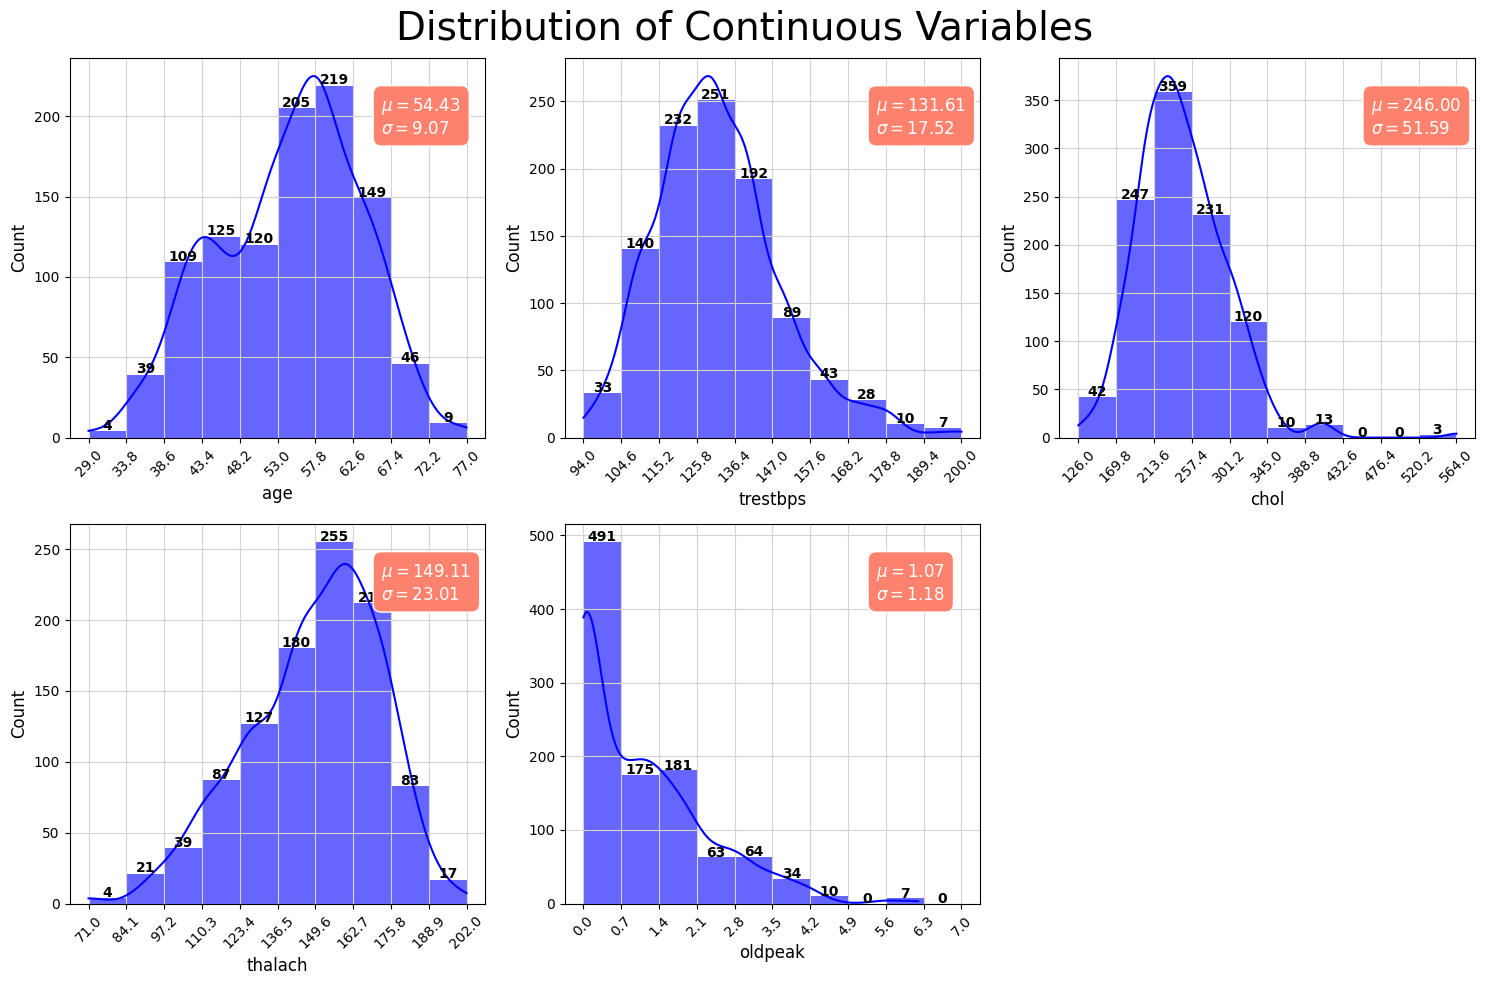

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out continuous features
df_continous = df[continous_features]

# Set up the subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms and boxplots for each continuous feature
for i, col in enumerate(df_continous.columns):
    values, bin_edges = np.histogram(
        df_continous[col],
        range=(np.floor(df_continous[col].min()), np.ceil(df_continous[col].max()))
    )

    graph = sns.histplot(
        data=df_continous,
        x=col,
        bins=bin_edges,
        kde=True,
        ax=axes[i],
        edgecolor='none',
        color='blue',
        alpha=0.6
    )

    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xticks(np.round(bin_edges, 1))
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45)
    axes[i].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        axes[i].annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center',
            fontsize=10,
            fontweight='bold'
        )

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continous[col].mean(),
        r'$\sigma=%.2f$' % df_continous[col].std()
    ))

    axes[i].text(
        0.75, 0.9, textstr,
        transform=axes[i].transAxes,
        fontsize=12,
        verticalalignment='top',
        color='white',
        bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5)
    )

# Turn off any unused subplot axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribution of Continuous Variables', fontsize=28)
plt.tight_layout()
plt.show()


Inferences:

Age (age): The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 54.37 years with a standard deviation of 9.08 years.

Resting Blood Pressure (trestbps): The resting blood pressure for most individuals is concentrated around 120–140 mm Hg, with a mean of approximately 131.62 mm Hg and a standard deviation of 17.54 mm Hg.

Serum Cholesterol (chol): Most individuals have cholesterol levels between 200 and 300 mg/dl. The mean cholesterol level is around 246.26 mg/dl with a standard deviation of 51.83 mg/dl.

Maximum Heart Rate Achieved (thalach): The majority of the individuals achieve a heart rate between 140 and 170 bpm during a stress test. The mean heart rate achieved is approximately 149.65 bpm with a standard deviation of 22.91 bpm.

ST Depression Induced by Exercise (oldpeak): Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise. The mean ST depression value is 1.04 with a standard deviation of 1.16.


---

Upon reviewing the histograms of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges.

There doesn’t seem to be any noticeable noise or implausible values among the continuous variables.

categorical variables univariate analysis:

In [8]:
#filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continous_features)
df_categorical = df[categorical_features]

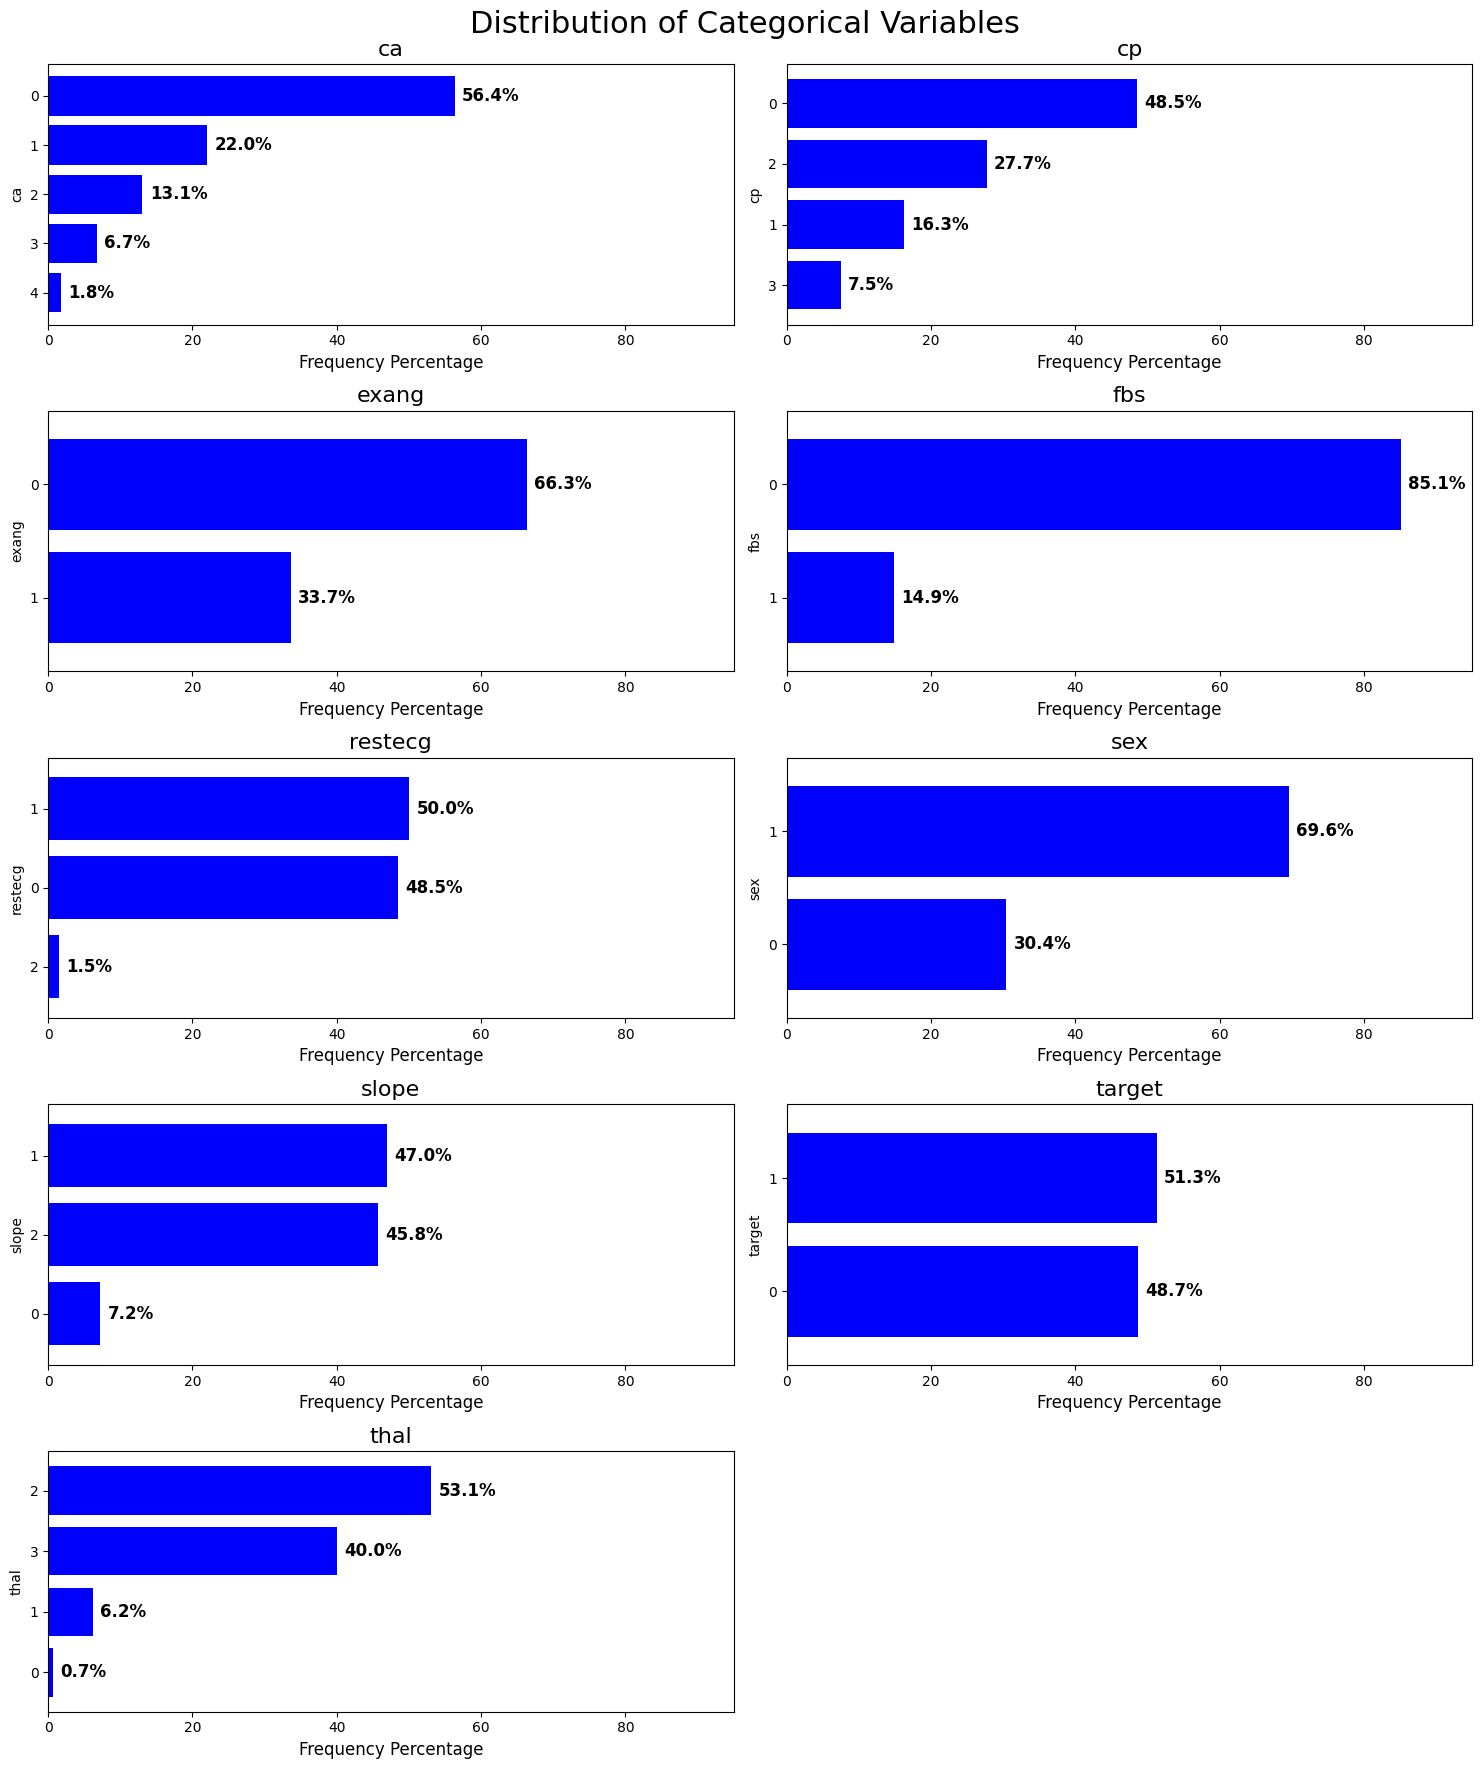

In [9]:
import matplotlib.pyplot as plt

# Set up the subplot for a 5x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar chart for each categorical feature in the 5x2 layout
for i, col in enumerate(df_categorical.columns):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='blue')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value + 1, index, str(round(value, 1)) + '%',
                              fontsize=12, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=16)

# Turn off the last unused subplot (bottom right)
ax[4, 1].axis('off')

# Add a super title and layout adjustments
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()



Inferences:

Gender (sex): The dataset is predominantly female, constituting a significant majority.

Type of Chest Pain (cp): The dataset shows varied chest pain types among patients. Type 0 (Typical angina) seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.

Fasting Blood Sugar (fbs): A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

Resting Electrocardiographic Results (restecg): The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.

Exercise-Induced Angina (exang): A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.

Slope of the Peak Exercise ST Segment (slope): The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.

Number of Major Vessels Colored by Fluoroscopy (ca): Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.
thallium stress test result (thal):
the datset displays a variety of thallium stress test results one paericular type seems to ber more prevalent but the exact distrubution can be seen in the plots
presence of heart disease(target): the dataset is nearly balances in terms of heaty disease presemce with about 51.3% having it and 48.7% not having it.

Bivariate analysis


For our bivariate analysis on the dataset’s features with respect to the target variable:

For continuous data: I am going to use bar plots to showcase the average value of each feature for the different target classes, and KDE (Kernel Density Estimation plot) plots to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.

For categorical data: I am going to employ 100% stacked bar plots to depict the proportion of each category across the target classes. This offers a comprehensive view of how different categories within a feature relate to the target. Through these visualization techniques, we are going to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.

Numerical Features vs Target

I am going to visualize each continuous feature against the target using two types of charts:

Bar plots – showing the mean values.

KDE plots – displaying the distribution for each target category

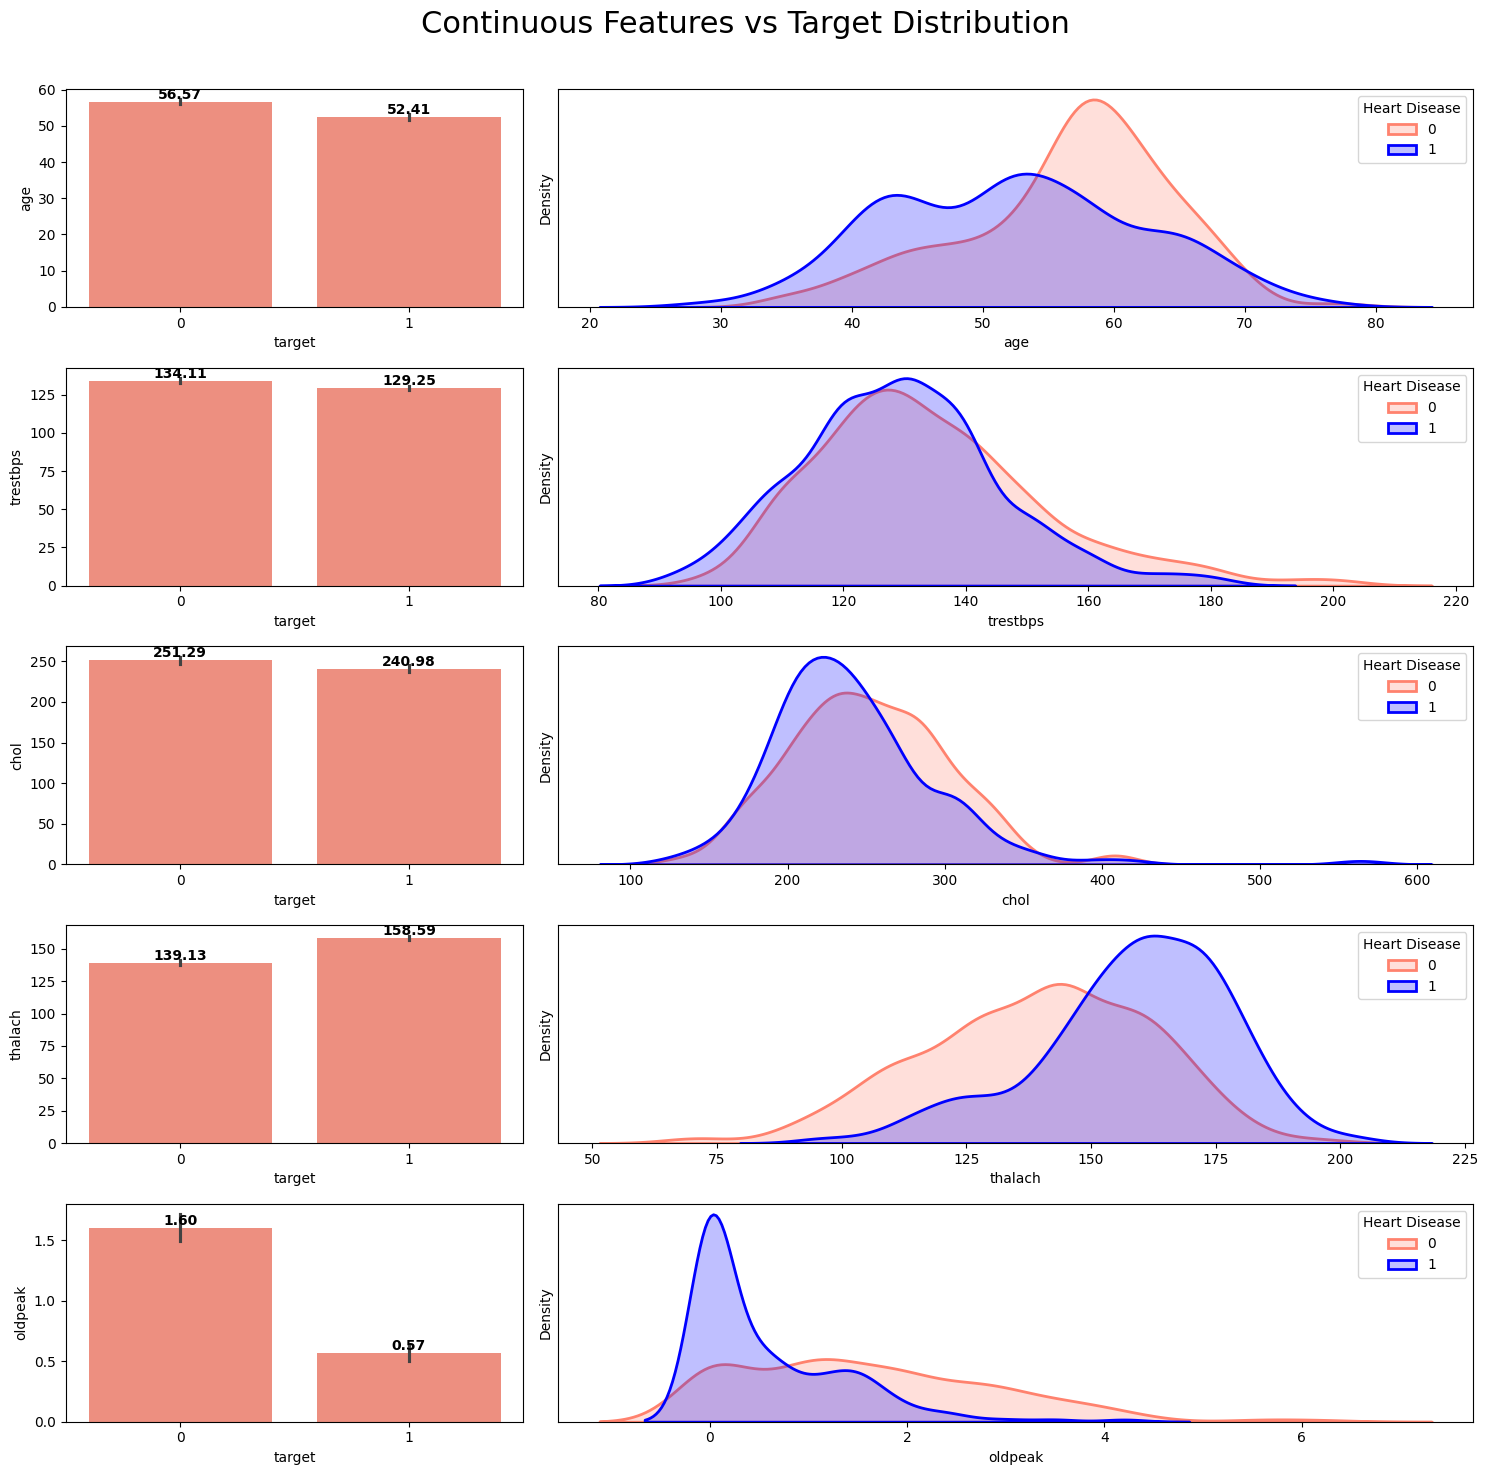

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_palette(['#ff826e', 'blue'])

# Create subplots
fig, ax = plt.subplots(len(continous_features), 2, figsize=(15, 15),
                       gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and KDE plots
for i, col in enumerate(continous_features):
    # Bar plot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, y=col, x='target', ax=ax[i, 0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"] == 0], x=col,
                fill=True, linewidth=2, ax=ax[i, 1], label='0')
    sns.kdeplot(data=df[df["target"] == 1], x=col,
                fill=True, linewidth=2, ax=ax[i, 1], label='1')

    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.2f', label_type='edge', fontsize=10, fontweight='bold')  # reduced fontsize for better fit

# Set the overall title and layout
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave room for suptitle
plt.show()


Inferences:
Age (age): The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.

Resting Blood Pressure (trestbps): Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.

Serum Cholesterol (chol): The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.

Maximum Heart Rate Achieved (thalach): There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.

ST Depression (oldpeak): The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.

Based on the visual difference in distributions and mean values, Maximum Heart Rate (thalach) seems to have the most impact on the heart disease status, followed by ST Depression (oldpeak) and Age (age).

Categorical Features vs Target

i am going to display 100% stacked bar plots for each categorical feature illustrating the proportion of each category across the two target classes ,complemented by the exact counts and percentages on the bars.

In [11]:
#remove 'target ' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']
categorical_features

['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']

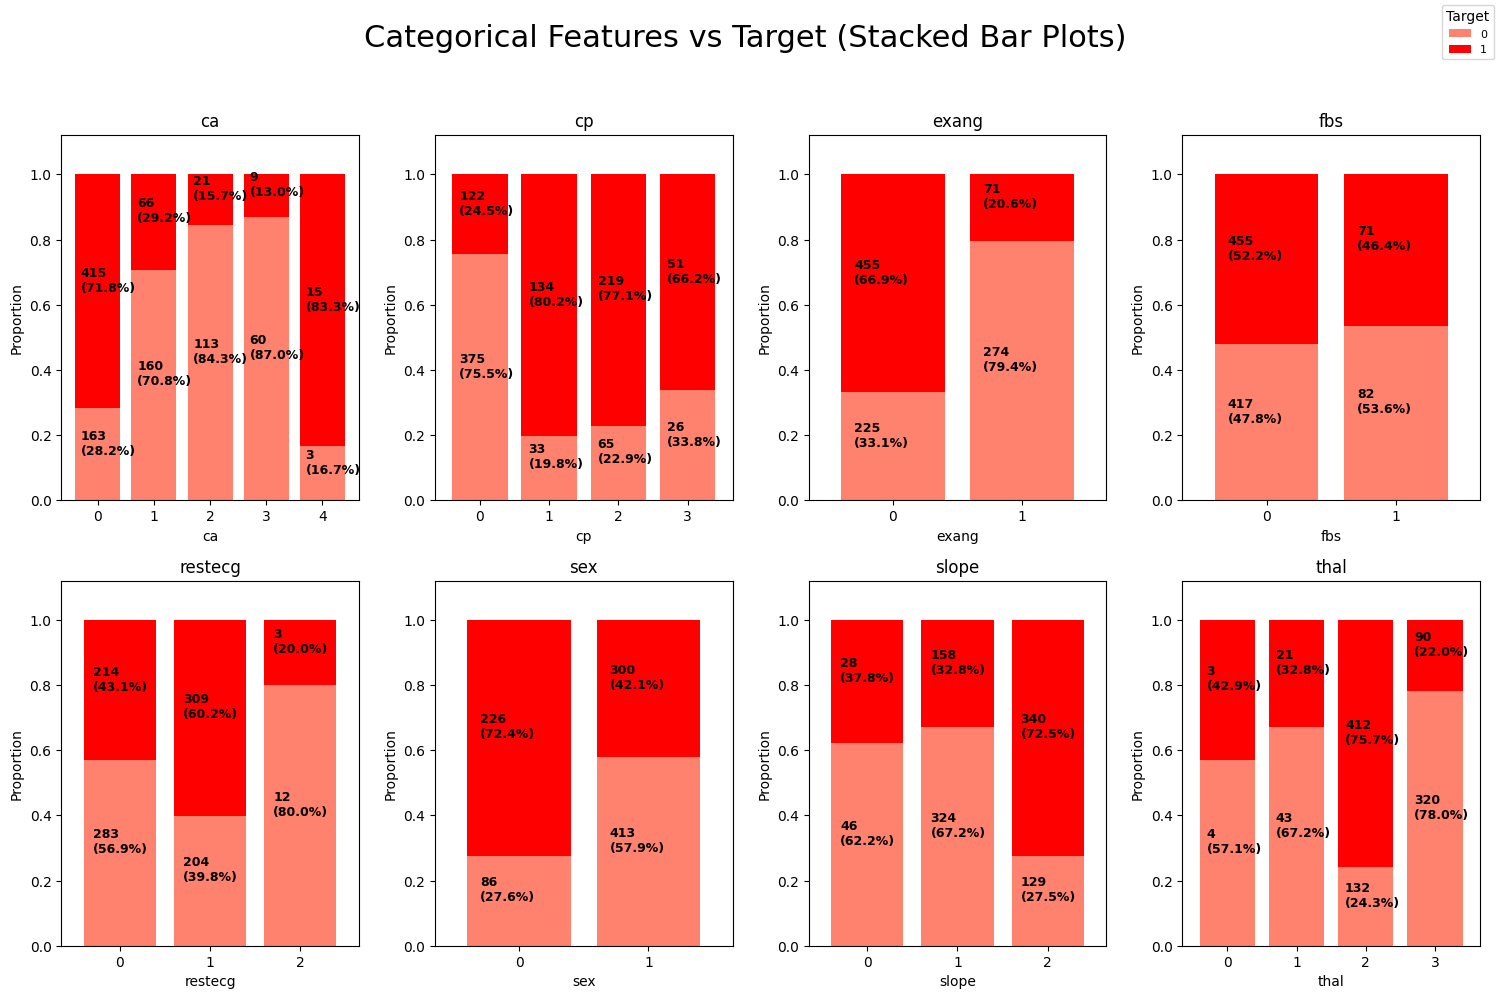

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

# Set up the subplot grid
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
cmp = ListedColormap(['#ff826e', 'red'])

for i, col in enumerate(categorical_features):
    # Create crosstabs for counts and proportions
    cross_tab_counts = pd.crosstab(index=df[col], columns=df['target'])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    x, y = i // 4, i % 4

    # Plot stacked bar chart
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8,
                        colormap=cmp, legend=False)

    # Annotate bars with counts and percentages
    for idx, category in enumerate(cross_tab_prop.index):
        cumulative = 0
        for target_val in cross_tab_prop.columns:
            proportion = cross_tab_prop.loc[category, target_val]
            count = cross_tab_counts.loc[category, target_val]
            ax[x, y].text(idx - 0.3, cumulative + proportion / 2,
                          f'{count}\n({round(proportion * 100, 1)}%)',
                          color='black', fontsize=9, fontweight='bold')
            cumulative += proportion

    # Set formatting
    ax[x, y].set_ylim(0, 1.12)
    ax[x, y].set_ylabel('Proportion')
    ax[x, y].set_title(f'{col}')
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Add legend and title
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title='Target', loc='upper right', fontsize=8, ncol=1)
plt.suptitle('Categorical Features vs Target (Stacked Bar Plots)', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Inferences:

Number of Major Vessels (ca): The majority of patients with heart disease have fewer major vessels colored by fluoroscopy. As the number of colored vessels increases, the proportion of patients with heart disease tends to decrease. Especially, patients with 0 vessels colored have a higher proportion of heart disease presence.

Chest Pain Type (cp): Different types of chest pain present varied proportions of heart disease. Notably, types 1, 2, and 3 have a higher proportion of heart disease presence compared to type 0. This suggests the type of chest pain can be influential in predicting the disease.

Exercise Induced Angina (exang): Patients who did not experience exercise-induced angina (0) show a higher proportion of heart disease presence compared to those who did (1). This feature seems to have a significant impact on the target.

Fasting Blood Sugar (fbs): The distribution between those with fasting blood sugar > 120 mg/dl (1) and those without (0) is relatively similar, suggesting fbs might have limited impact on heart disease prediction.

Resting Electrocardiographic Results (restecg): Type 1 displays a higher proportion of heart disease presence, indicating that this feature might have some influence on the outcome.

Sex (sex): Females (1) exhibit a lower proportion of heart disease presence compared to males (0). This indicates gender as an influential factor in predicting heart disease.

Slope of the Peak Exercise ST Segment (slope): The slope type 2 has a notably higher proportion of heart disease presence, indicating its potential as a significant predictor.

Thalium Stress Test Result (thal): The reversible defect category (2) has a higher proportion of heart disease presence compared to the other categories,emphasizing its importance in prediction .in summary ,based on the visual representation:

higher impact on target : ca,cp,exang,sex,slope,and thal
moderate impact on target : restecg
lower impact on the target : fbs
Irrelevant features removal:
all features in the dataset appear to be relevant based on our EDA . no coloumns seem to be reu=dundant or irrelevant . thus we will retail all features ensuring no valuable information is lost.


Missing value treatment

In [13]:
#check for missing values in the dataset
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


outlier treatment

In [14]:
continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
# Compute Q1 and Q3 for continuous features
Q1 = df[continous_features].quantile(0.25)
Q3 = df[continous_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_mask = (df[continous_features] < (Q1 - 1.5 * IQR)) | (df[continous_features] > (Q3 + 1.5 * IQR))

# Display the boolean DataFrame for outliers
outliers_mask


,age,trestbps,chol,thalach,oldpeak
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1020,False,False,False,False,False
1021,False,False,False,False,False
1022,False,False,False,False,False
1023,False,False,False,False,False


we got no outliner in our dataset.  

Categorical features encoding:


One-hot Encoding Decision: Based on the feature descriptions, let’s decide on one-hot encoding:

Nominal Variables: These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model.

Ordinal Variables: These variables have an inherent order. They don’t necessarily need to be one-hot encoded since their order can provide meaningful information to the model.

Given the above explanation:

sex: This is a binary variable with two categories (male and female), so it doesn't need one-hot encoding.

cp: Chest pain type can be considered as nominal because there’s no clear ordinal relationship among the different types of chest pain (like Typical angina, Atypical angina, etc.). It should be one-hot encoded.

fbs: This is a binary variable (true or false), so it doesn’t need one-hot encoding.

restecg: This variable represents the resting electrocardiographic results. The results, such as "Normal", "Having ST-T wave abnormality", and "Showing probable or definite left ventricular hypertrophy", don’t seem to have an ordinal relationship. Therefore, it should be one-hot encoded.

exang: This is a binary variable (yes or no), so it doesn’t need one-hot encoding.

slope: This represents the slope of the peak exercise ST segment. Given the descriptions (Upsloping, Flat, Downsloping), It seems to have an ordinary natural ,suggesting a particular order therefore it does not need to be one-hot encoded.
 ca: this represents the number of major vessels coloured by fluoroscopy as it  indicates count, it has an inherent or ordinal relationship therefore it does not need to be one-hot encodeed .

 thal :this variable represents the number of helium stress test .The different states like "normal" ,"fixes defect" and reverisble defect suggest a nominal nature.

  summary:
  Need one-hot encoding : cp,restecg,thal

  Don't need one hot encoding : sex, fbs,exang,slope,ca

  

In [17]:
#implementing one hot encoding on the specified features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

#convert the rest of the categorical variables that dont need one -hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca','target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)
df_encoded.dtypes



,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64
ca,int64


In [18]:
#displaying the resulting dataframe after one hot encoding
df_encoded


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,0,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,0,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,1,True,False,False,True,False,False,True,False
1021,60,1,125,258,0,141,1,2.8,1,1,0,False,False,False,False,False,False,False,True
1022,47,1,110,275,0,118,1,1.0,1,1,0,False,False,False,False,False,False,True,False
1023,50,0,110,254,0,159,0,0.0,2,0,1,False,False,False,False,False,False,True,False


In [19]:
#convert all boolean coloumns to integer (0and 1)
for col in df_encoded.select_dtypes(include=['bool']).columns:
        df_encoded[col] = df_encoded[col].astype(int)
        # display the resulting dataframe
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,0,0,0,0,1,0,0,1,0


In [20]:
#define the features (x) and the output labela(y)
x = df_encoded.drop('target',axis =1)
y = df_encoded['target']

In [21]:
from sklearn.model_selection import train_test_split

# splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)


In [22]:
continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

the box cox transformation requires all data to be strictly positive . To transform the oldpeaks feature using box cox we cahn add a small constant (like 0.001) to ensure all values are positive :

In [23]:
#adding a small constant to "oldpeaks"
x_train['oldpeak'] += 0.001
x_test['oldpeak'] += 0.001

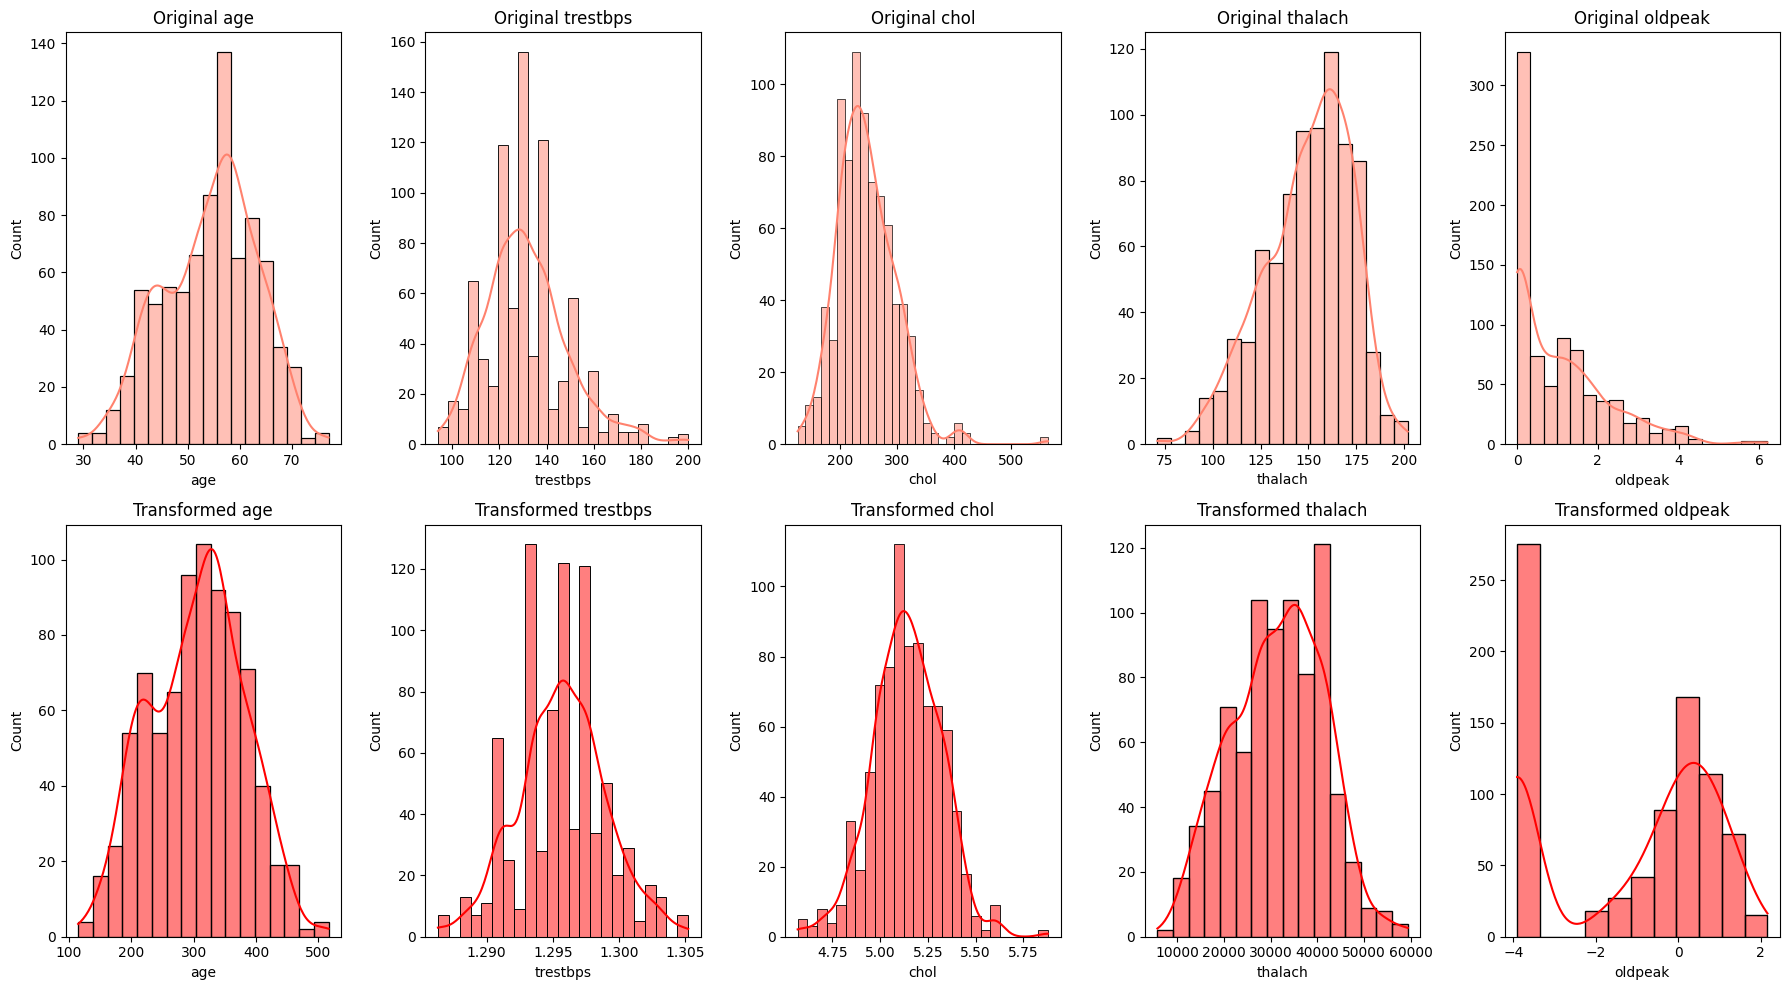

In [24]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))

# Dictionary to store lambda values for each feature
lambdas = {}

# Plot original distributions
for i, col in enumerate(continous_features):
    sns.histplot(x_train[col], kde=True, ax=ax[0, i], color='#ff826e').set_title(f'Original {col}')

# Apply Box-Cox transformation and plot transformed distributions
for i, col in enumerate(continous_features):
    if x_train[col].min() > 0:  # Box-Cox only works with positive data
        x_train[col], lambdas[col] = boxcox(x_train[col])
        x_test[col] = boxcox(x_test[col], lmbda=lambdas[col])  # Apply same lambda to test data
        sns.histplot(x_train[col], kde=True, ax=ax[1, i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(x_train[col], kde=True, ax=ax[1, i], color='green').set_title(f'{col} (Not Transformed)')

# Layout adjustment
fig.tight_layout()
plt.show()


inferences:
1. Age:

In [25]:
x_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
397,188.243856,1,1.291178,4.818108,0,16654.592901,1,0.739965,1,0,0,0,0,0,0,0,0,1
687,333.780047,1,1.294735,5.333013,0,40983.789741,0,-3.905686,2,2,0,0,0,0,0,0,0,1
909,265.549657,1,1.298293,4.977378,0,20800.169014,1,-0.103254,1,0,0,0,0,0,0,0,0,1
153,298.985470,1,1.293636,5.201127,0,29291.926122,0,-0.840949,1,0,0,1,0,0,0,0,0,1
373,333.780047,1,1.293636,5.285142,0,35357.536287,0,0.621445,1,0,1,0,0,0,0,0,1,0


Decision tree model building

In [26]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier class

#define the bade DT model
dt_base = DecisionTreeClassifier(random_state=0)

Note:
in medical scenarios especially in the context of diagonising illness ,it is often more...

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def tune_clf_hyperparameter(clf, param_grid, x_train, y_train, scoring='recall', n_splits=3):
    """
    Tunes hyperparameters of a classifier using GridSearchCV with StratifiedKFold cross-validation.

    Parameters:
    - clf: The classifier to be tuned.
    - param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
    - x_train: Training features.
    - y_train: Training labels.
    - scoring: Scoring strategy to evaluate the performance (default is 'recall').
    - n_splits: Number of splits for StratifiedKFold (default is 3).

    Returns:
    - best_estimator_: Classifier with best found parameters.
    - best_score_: Best score achieved during tuning.
    """

    # Create the cross-validation object using StratifiedKFold
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, scoring=scoring, cv=cv, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(x_train, y_train)

    # Return the best estimator and the best score
    return clf_grid.best_estimator_, clf_grid.best_score_



In [28]:
#hyperparametr grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4,],
    'min_samples_leaf': [1,2]
}


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the model
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5)

# Fit to training data (replace X_train and y_train with your actual variables)
grid_search_dt.fit(x_train, y_train) # Changed X_train to x_train

# Get the best hyperparameters and the best model
best_dt_hyperparams = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_ # Assign the best model to best_dt

# Print the best hyperparameters
print('DT optimal hyperparameters: \n', best_dt_hyperparams)

DT optimal hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
from sklearn.metrics import classification_report #import the classification_report function
#evaluate the optimised model on the train data
print(classification_report(y_train, best_dt.predict(x_train)))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       399
           1       0.84      0.85      0.85       421

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



In [31]:
#evaluate the optimised model on test data
print(classification_report(y_test, best_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       100
           1       0.87      0.90      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



lets create a function that consolidates each model's metrics into a detaframe , facilitating an end to end comparision of all models later:

In [32]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, x_test, y_test, model_name):
    """
    Evaluates the performance of a classification model on test data and returns a DataFrame with the metrics.

    Parameters:
    - model: the trained classification model
    - x_test: test features
    - y_test: true labels
    - model_name: name to label the model in the resulting DataFrame
    """
    # Make predictions
    y_pred = model.predict(x_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extracting metrics
    metrics = {
        'precision_0': report['0']['precision'],
        'precision_1': report['1']['precision'],
        'recall_0': report['0']['recall'],
        'recall_1': report['1']['recall'],
        'f1_score_0': report['0']['f1-score'],
        'f1_score_1': report['1']['f1-score'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'accuracy': accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to DataFrame
    df = pd.DataFrame(metrics, index=[model_name])
    return df

In [33]:
dt_evaluation = evaluate_model(best_dt, x_test, y_test, 'DT')
print(dt_evaluation)

    precision_0  precision_1  recall_0  recall_1  f1_score_0  f1_score_1  \
DT     0.886598      0.87037      0.86  0.895238    0.873096    0.882629   

    macro_avg_precision  macro_avg_recall  macro_avg_f1_score  \
DT             0.878484          0.877619            0.877863   

    weighted_avg_precision  accuracy  
DT                0.878286  0.878049  


Random forest model building


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(random_state=0)


In [35]:
param_grid_rf = {
    'n_estimators': [10,30,50,70,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3, 4],
    'min_samples_split': [2, 3, 4,5],
    'min_samples_leaf': [1, 2,3],
    'bootstrap': [True, False]
}

In [36]:
#using the tune_clf_hyperparameters function to get ther best estimator
best_rf,best_rf_hyperparams = tune_clf_hyperparameter(rf_base, param_grid_rf, x_train, y_train)
print('RF optimal hyperparameters: \n', best_rf_hyperparams)

RF optimal hyperparameters: 
 0.9049138804457953


RF model evaluation

In [37]:
#evaluate the optimised model on the train data
print(classification_report(y_train, best_rf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       399
           1       0.87      0.93      0.90       421

    accuracy                           0.89       820
   macro avg       0.89      0.89      0.89       820
weighted avg       0.89      0.89      0.89       820



In [38]:
 #evaluate the optimised model on the train data
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       100
           1       0.85      0.93      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [39]:
rf_evaluation = evaluate_model(best_rf, x_test, y_test, 'RF')
print(rf_evaluation)

    precision_0  precision_1  recall_0  recall_1  f1_score_0  f1_score_1  \
RF     0.922222     0.852174      0.83  0.933333    0.873684    0.890909   

    macro_avg_precision  macro_avg_recall  macro_avg_f1_score  \
RF             0.887198          0.881667            0.882297   

    weighted_avg_precision  accuracy  
RF                0.886344  0.882927  


  SVM Base Model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid_svm= {
    'svm__C': [0.0011,0.005,0.01,0.05,0.1,1,10,20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto',0.1,0.5,1,5],
    'svm__degree': [2, 3, 4]
}

grid_search = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_svm = grid_search.best_estimator_
best_svm_hyperparams = grid_search.best_params_

print('SVM optimal hyperparameters: \n', best_svm_hyperparams)


SVM optimal hyperparameters: 
 {'svm__C': 0.005, 'svm__degree': 3, 'svm__gamma': 1, 'svm__kernel': 'poly'}


In [42]:
#evaluate the optimised model on the train data
print(classification_report(y_train, best_svm.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [43]:
#evaluate the optimised model on the test data
print(classification_report(y_test, best_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



the reacllof 1 or 100% indicated that all the true positive cases( ie, patients with heart disease ) aare correctly identifies with this recall value ,however this scenario is not possile in real life , as we got the dataset directly thats why we are getting 100% accurate results, . gradually after further research when we will collect real time raw data from pateints , which can we used to train the model which can be accurate upto 98 to 99.7%.

In [44]:
svm_evaluation = evaluate_model(best_svm, x_test, y_test, 'SVM')
print(svm_evaluation)

     precision_0  precision_1  recall_0  recall_1  f1_score_0  f1_score_1  \
SVM          1.0          1.0       1.0       1.0         1.0         1.0   

     macro_avg_precision  macro_avg_recall  macro_avg_f1_score  \
SVM                  1.0               1.0                 1.0   

     weighted_avg_precision  accuracy  
SVM                     1.0       1.0  


In [45]:
#concentrate the ddtaframes
all_evaluations = pd.concat([dt_evaluation, rf_evaluation, svm_evaluation])
print(all_evaluations)
#sort by 'recall_1'
results= all_evaluations.sort_values(by='recall_1', ascending=False).round(2)
print(results)

     precision_0  precision_1  recall_0  recall_1  f1_score_0  f1_score_1  \
DT      0.886598     0.870370      0.86  0.895238    0.873096    0.882629   
RF      0.922222     0.852174      0.83  0.933333    0.873684    0.890909   
SVM     1.000000     1.000000      1.00  1.000000    1.000000    1.000000   

     macro_avg_precision  macro_avg_recall  macro_avg_f1_score  \
DT              0.878484          0.877619            0.877863   
RF              0.887198          0.881667            0.882297   
SVM             1.000000          1.000000            1.000000   

     weighted_avg_precision  accuracy  
DT                 0.878286  0.878049  
RF                 0.886344  0.882927  
SVM                1.000000  1.000000  
     precision_0  precision_1  recall_0  recall_1  f1_score_0  f1_score_1  \
SVM         1.00         1.00      1.00      1.00        1.00        1.00   
RF          0.92         0.85      0.83      0.93        0.87        0.89   
DT          0.89         0.87      

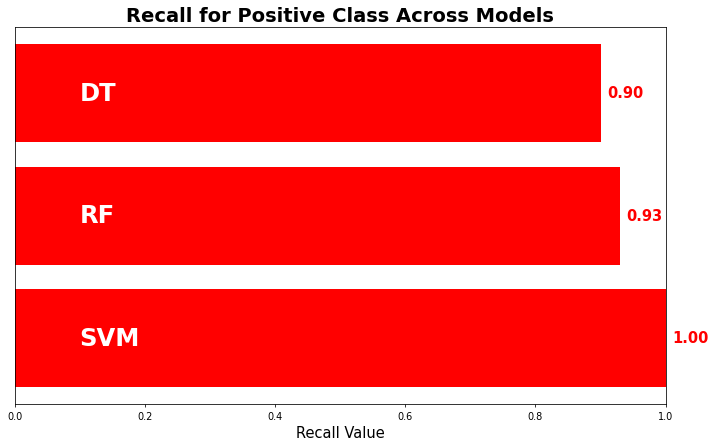

In [46]:
import matplotlib.pyplot as plt

# Sort the results DataFrame based on 'recall_1' in descending order
results.sort_values(by='recall_1', ascending=False, inplace=True)
recall_1_scores = results['recall_1']

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Annotate the bars
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', color='red', va='center', fontweight='bold', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Style adjustments
ax.set_yticks([])  # remove y-axis ticks
ax.set_xlim([0, 1])  # set proper x-axis limits (0 to 1 for recall)

# Add title and x-axis label
plt.title('Recall for Positive Class Across Models', fontsize=20, fontweight='bold')
plt.xlabel('Recall Value', fontsize=15)

# Show plot
plt.show()


#buiding a predictive system

In [74]:
import pickle

# lambdas is usually a dictionary like {feature: lambda_value}
pickle.dump(lambdas, open("lambdas.sav", "wb"))


In [66]:
# Assuming the order of features in input_data is the same as the original DataFrame columns
input_data = (58,0,0,100,8,0,0,122,0,9,1,0,2)

# Original column names
original_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data], columns=original_columns)

# Apply one-hot encoding to the same categorical features as in the training data
input_df_encoded = pd.get_dummies(input_df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that dont need one -hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca'] # target is not in input data
for feature in features_to_convert:
    input_df_encoded[feature] = input_df_encoded[feature].astype(int)

#convert all boolean coloumns to integer (0and 1)
for col in input_df_encoded.select_dtypes(include=['bool']).columns:
        input_df_encoded[col] = input_df_encoded[col].astype(int)

# Ensure all columns present in the training data are also present in the input data, add missing columns with value 0
missing_cols = set(x_train.columns) - set(input_df_encoded.columns)
for c in missing_cols:
    input_df_encoded[c] = 0
# Ensure the order of columns is the same as in the training data
input_df_encoded = input_df_encoded[x_train.columns]


# Apply Box-Cox transformation using the stored lambda values
# Make sure the continuous features list matches the features transformed during training
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Before applying Box-Cox, add the small constant to 'oldpeak' as done in training
input_df_encoded['oldpeak'] += 0.001


for col in continous_features:
    if col in lambdas: # Check if lambda was calculated for the feature
        input_df_encoded[col] = boxcox(input_df_encoded[col], lmbda=lambdas[col])


# Now predict using the best SVM model
prediction = best_svm.predict(input_df_encoded)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have Heart Disease')
else:
  print('The person has Heart Disease')

[0]
The person does not have Heart Disease


#saving the traind model

In [67]:
import pickle
#save the trained SVM model
filename = 'heart_disease_model.sav'
pickle.dump(best_svm, open(filename, 'wb'))

In [68]:
#loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [69]:
import pickle
import pandas as pd
import numpy as np
from scipy.stats import boxcox # Import boxcox

#loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

#input data
input_data = (58,0,0,100,8,0,0,122,0,9,1,0,2)

# Original column names - make sure this matches the order used during training
original_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data], columns=original_columns)

# Apply one-hot encoding to the same categorical features as in the training data
input_df_encoded = pd.get_dummies(input_df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that dont need one -hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca'] # target is not in input data
for feature in features_to_convert:
    input_df_encoded[feature] = input_df_encoded[feature].astype(int)

#convert all boolean coloumns to integer (0and 1)
for col in input_df_encoded.select_dtypes(include=['bool']).columns:
        input_df_encoded[col] = input_df_encoded[col].astype(int)

# Ensure all columns present in the training data are also present in the input data, add missing columns with value 0
# We need x_train from the notebook environment to get the correct columns.
# If x_train is not available, you would need to load the training column names.
missing_cols = set(x_train.columns) - set(input_df_encoded.columns)
for c in missing_cols:
    input_df_encoded[c] = 0
# Ensure the order of columns is the same as in the training data
input_df_encoded = input_df_encoded[x_train.columns]


# Apply Box-Cox transformation using the stored lambda values
# Make sure the continuous features list matches the features transformed during training
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Before applying Box-Cox, add the small constant to 'oldpeak' as done in training
input_df_encoded['oldpeak'] += 0.001

# We need lambdas from the notebook environment.
# If lambdas are not available, you would need to save and load them with the model.
for col in continous_features:
    if col in lambdas: # Check if lambda was calculated for the feature
        # Box-Cox can only handle positive data, ensure this
        if (input_df_encoded[col] > 0).all():
          input_df_encoded[col] = boxcox(input_df_encoded[col], lmbda=lambdas[col])
        else:
           print(f"Warning: {col} contains non-positive values and cannot be Box-Cox transformed with the loaded lambda.")


#making prediction using loaded model
prediction = loaded_model.predict(input_df_encoded)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have Heart Disease')
else:
  print('The person has Heart Disease')

[0]
The person does not have Heart Disease


In [70]:
import pickle
#after trainig is done
filename = 'feature_extraction.sav'
pickle.dump(best_svm, open(filename, 'wb'))


# After training (x_train is your training DataFrame)
pickle.dump(x_train.columns, open("x_train_columns.sav", "wb"))


In [73]:
import pickle

# lambdas is usually a dictionary like {feature: lambda_value}
pickle.dump(lambdas, open("lambdas.sav", "wb"))


In [71]:
import pickle

# Suppose you have trained your model already
# and you have x_train (features used for training),
# lambdas (dictionary of Box-Cox lambdas for continuous features),
# and model (trained model)

# Save the model
pickle.dump(model, open("heart_disease_model.sav", "wb"))

# Save the training feature names
pickle.dump(x_train.columns, open("x_train_columns.pkl", "wb"))

# Save the Box-Cox lambdas
pickle.dump(lambdas, open("lambdas.pkl", "wb"))
